Magnetic Spectrometer Code Analysis
Author: Jason Cardarelli
2019

Normalized Units for Code:
The code is normalized to the base units of m, e, c, e, and $\omega_{c0}=q B_0/m$. This is similar to the OSIRIS unit system, but with $\omega_{c0}$, the cyclotron frequency of the central longitudinal energy, replacing $\omega_p$. The corrections to measures are as follows: <br>
$t'= t*\omega_{c0}$ <br>
$x'= x*\omega_{c0}/c$ <br>
$B'= B*e/(c*m*\omega_{c0}) = B/B_0$ <br>
$Energy' = Energy/(mc^2) = \gamma$ <br>

In [45]:
!pwd
%cd ../source_code/
!make
!./run
%cd ../data/

/Users/jcardar/research/magneticSpectrometerCode/continuous_field/data
/Users/jcardar/research/magneticSpectrometerCode/continuous_field/source_code
make: `run' is up to date.
particle number 1
Particle Timed-Out.
particle number 2
Particle Timed-Out.
particle number 3
Particle Timed-Out.
particle number 4
Particle Timed-Out.
particle number 5
Particle Timed-Out.
particle number 6
Particle Timed-Out.
particle number 7
Particle Timed-Out.
particle number 8
Particle Timed-Out.
particle number 9
Particle Timed-Out.
particle number 10
Particle Timed-Out.
/Users/jcardar/research/magneticSpectrometerCode/continuous_field/data


In [46]:
import matplotlib as mp
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import csv
import numpy as np
import itertools
import math
#import tabulate



In [47]:
with open("XPOS.csv") as csvfile:
    csv_reader = csv.reader(csvfile, delimiter=',');
    line_count = 0;
    posx = list(csv_reader);
#     print(posx)
    posx = [[float(y) for y in x[0:-2]] for x in posx]

In [48]:
with open("YPOS.csv") as csvfile:
    csv_reader = csv.reader(csvfile, delimiter=',',quoting=csv.QUOTE_NONNUMERIC);
    line_count = 0;
    posy = list(csv_reader);
    posy = [[float(y) for y in x[0:-2]] for x in posy]
#     posy = float(posy);
#     posy = pd.DataFrame.from_records(list(gen_rows(csvfile)))
#     del posy[0]
#     posy = posy.applymap(lambda x : float(x))

In [49]:
with open("ZPOS.csv") as csvfile:
    csv_reader = csv.reader(csvfile, delimiter=',');
    line_count = 0;
    posz = list(csv_reader);
    posy = [[float(y) for y in x[0:-2]] for x in posz]
#     posz = pd.DataFrame.from_records(list(gen_rows(csvfile)))
#     del posz[0]
#     posz = posz.applymap(lambda x : float(x))

In [50]:
with open("MOMENTUM_X.csv") as csvfile:
    csv_reader = csv.reader(csvfile, delimiter=',');
    line_count = 0;
    px = list(csv_reader);
    px = [[float(y) for y in x[0:-2]] for x in px]
#    px = pd.DataFrame.from_records(list(gen_rows(csvfile)))
#    del px[0]
#    px = px.applymap(lambda x : float(x))

In [51]:
with open("MOMENTUM_Y.csv") as csvfile:
    csv_reader = csv.reader(csvfile, delimiter=',');
    line_count = 0;
    py = list(csv_reader);
    py = [[float(y) for y in x[0:-2]] for x in py]
#     py = pd.DataFrame.from_records(list(gen_rows(csvfile)))
#     del py[0]
#     py = py.applymap(lambda x : float(x))

In [52]:
with open("MOMENTUM_Z.csv") as csvfile:
    csv_reader = csv.reader(csvfile, delimiter=',');
    line_count = 0;
    pz = list(csv_reader);
    pz = [[float(y) for y in x[0:-2]] for x in pz]
#     pz = pd.DataFrame.from_records(list(gen_rows(csvfile)))
#     del pz[0]
#     pz = pz.applymap(lambda x : float(x))

In [53]:
with open("TIME.csv") as csvfile:
    csv_reader = csv.reader(csvfile, delimiter=',');
    line_count = 0;
    time = list(csv_reader);
#     time = pd.DataFrame.from_records(list(gen_rows(csvfile)))
#     time = time.applymap(lambda x : float(x))

In [54]:
with open("ENERGY.csv") as csvfile:
    csv_reader = csv.reader(csvfile, delimiter=',');
    line_count = 0;
    energy = list(csv_reader);
    
#     energy = pd.DataFrame.from_records(list(gen_rows(csvfile)))
#     del energy[0]
#     energy = energy.applymap(lambda x : float(x))

In [55]:
magnet = pd.read_csv("MAGNETS.csv")

In [56]:
screen = pd.read_csv("SCREENS.csv")

In [57]:
del_time = pd.read_csv("DEL_T.csv", dtype=float, header = -1)

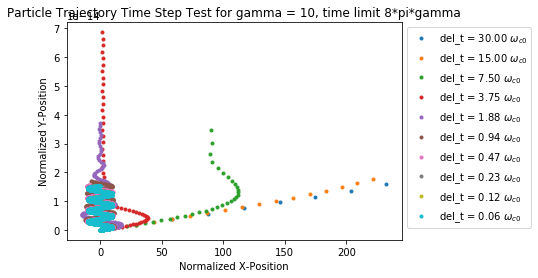

In [58]:
num_par    = len(posx);
fig, ax = plt.subplots()
for ii in range(num_par):
    ax.plot(posx[ii], posy[ii],'.', label='del_t = %.2f $\omega_{c0}$' % (del_time.loc[ii][0]));
ax.legend(bbox_to_anchor=(1, 1));
ax.set_xlabel('Normalized X-Position');
ax.set_ylabel('Normalized Y-Position');
ax.set_title('Particle Trajectory Time Step Test for gamma = 10, time limit 8*pi*gamma');

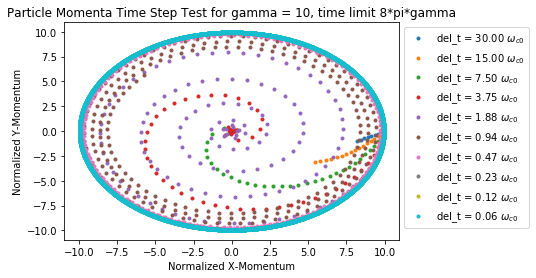

In [59]:
num_par    = len(posx);
fig, ax = plt.subplots()
for ii in range(num_par):
    ax.plot(px[ii], py[ii],'.', label='del_t = %.2f $\omega_{c0}$' % (del_time.loc[ii][0]));
ax.legend(bbox_to_anchor=(1, 1));
ax.set_xlabel('Normalized X-Momentum');
ax.set_ylabel('Normalized Y-Momentum');
ax.set_title('Particle Momenta Time Step Test for gamma = 10, time limit 8*pi*gamma');

In [ ]:
import matplotlib.pyplot as plt
# plt.rc('text', usetex=True)
fig, ax = plt.subplots(figsize=(20,16));
ax.plot(posx[0], posy[0],'.');
ax.set_xlabel(r"X Position [ Normalized(c/$\omega _{c,0})]$");
ax.set_ylabel(r"Y Position [Normalized (c/$\omega _{c,0})]$");
ax.set_title("X & Y Positions for electrons in ");

In [44]:
#NORMALIZING UNIT SYSTEM:
E0 = 1000            #MeV
B0 = 1               #T
qe = 1.602*10**-19   #C
me = 9.11* 10**-31   #kg
c  = 299792458       #m/s
gamma0 = (E0+0.511)/0.511


omegaNorm  = (qe*B0)/(me)
lengthNorm = omegaNorm/c


v_perp0  = c*((1-(1/(gamma0*gamma0)))**0.5)
rL0_real = gamma0*me*v_perp0/(qe*B0)
rL0_BAR  = rL0_real*lengthNorm


cm_30    = 0.3*lengthNorm
cm_20    = 0.2*lengthNorm
cm_10    = 0.1*lengthNorm
cm_03    = 0.03*lengthNorm


#display('qe         = %.3E' % qe)
#display('me         = %.3E' % me)
#display('c          = %.3E' % c)
display('omegaNorm  = %.3E' % omegaNorm)
#display('lengthNorm = %.3E' % lengthNorm)
display('gamma0     = %.3f' % gamma0)
display("rL0_BAR    = %.3f" % rL0_BAR)
display("rL0_real   = %.3f" % rL0_real)
display("30 cm      = %.3f" % cm_30)
display("10 cm      = %.3f" % cm_10)
display("3 cm       = %.3f" % cm_03)

'omegaNorm  = 1.759E+11'

'gamma0     = 1957.947'

'rL0_BAR    = 1957.947'

'rL0_real   = 3.338'

'30 cm      = 175.972'

'10 cm      = 58.657'

'3 cm       = 17.597'

In [ ]:
plot_real_units = False

plot_pos = True
plot_mom = False
plot_lamour_radius = False
plot_magnet = False
plot_screen = False

In [ ]:
# num_par    = posx.shape[0]
num_par    = len(posx);
num_mag    = magnet.shape[0]
num_screen = screen.shape[0]

# %matplotlib inline 
mp.use('Agg')

plt.rcParams['figure.figsize'] = [10, 5]
fig,ax = plt.subplots(1)

if plot_pos == True:
    for ii in range(num_par):
        if plot_real_units == True:
#             plt.plot(posx.iloc[ii]/lengthNorm,posy.loc[ii]/lengthNorm,label='Energy = %.2f MeV' % (float(energy.iloc[ii][1])*0.511-0.511))
            ax.plot(posx[ii], posy[ii]);
        else:
#             ax.plot(posx,posy, label='Energy = %.3f MeV, del_t = %.2f $\omega_{c0}$' % (energy[ii][1]*0.511-0.511, del_time.loc[ii][0]))
            plt.plot(posx[ii],posy[ii], label='Energy = %.3f MeV, del_t = %.2f $\omega_{c0}$' % (float(energy[ii][1])*0.511-0.511, del_time.loc[ii][0]));
#             plt.plot(posx.iloc[ii],posy.iloc[ii],label='Energy = %.3f MeV, del_t = %.2f $\omega_{c0}$' % (energy.iloc[ii][1]*0.511-0.511, del_time.loc[ii][0]))
        
if plot_mom == True:
    for ii in range(num_par):
        if plot_real_units == True:
            plt.subplot(floor(num_par/2),ceil(num_par/2),ii+1)
            plt.plot(px.iloc[ii]/lengthNorm,py.loc[ii]/lengthNorm,label='Energy = %.3f MeV' % (float(energy.iloc[ii][1])*0.511))
        else:
            plt.subplot(math.floor(num_par/2),math.ceil(num_par/2),ii+1)
            plt.plot(px.iloc[ii]+10*ii,py.iloc[ii]+10*ii,label='Energy = \n %.3f MeV \n del_t = \n %.2f $\omega_{c0}$' % (energy.iloc[ii][1], del_time.loc[ii][0]))
            plt.legend()
            plt.xlabel('$p_x /(c m)$')
            plt.ylabel('$p_y /(c m)$')
    
if plot_screen == True:
    for ii in range(num_screen):
        screenX = np.array([screen.iloc[ii][1],screen.iloc[ii][1]+(screen.iloc[ii][5]*np.cos(np.radians(screen.iloc[ii][4])))])
        screenY = np.array([screen.iloc[ii][2],screen.iloc[ii][2]+(screen.iloc[ii][5]*np.sin(np.radians(screen.iloc[ii][4])))])
        if plot_real_units == True:
            plt.plot(screenX/lengthNorm,screenY/lengthNorm,'-k')
        else:
            plt.plot(screenX,screenY,'-k')
        
if plot_magnet == True:
    for ii in range(num_mag):
        if plot_real_units == True:
            rect = patches.Rectangle((magnet.iloc[ii][2]/lengthNorm,(magnet.iloc[ii][3]-(magnet.iloc[ii][6]/2))/lengthNorm),magnet.iloc[ii][5]/lengthNorm,magnet.iloc[ii][6]/lengthNorm,linewidth=1,edgecolor='k',facecolor='none')
            plt.ylim((magnet.iloc[ii][3]-(magnet.iloc[ii][6]/2)-0.01)/lengthNorm,(magnet.iloc[ii][3]+(magnet.iloc[ii][6]/2)+0.01)/lengthNorm)
        else:
            rect = patches.Rectangle((magnet.iloc[ii][2],magnet.iloc[ii][3]-(magnet.iloc[ii][6]/2)),magnet.iloc[ii][5],magnet.iloc[ii][6],linewidth=1,edgecolor='k',facecolor='none')
            plt.ylim(magnet.iloc[ii][3]-(magnet.iloc[ii][6]/2)-0.01,magnet.iloc[ii][3]+(magnet.iloc[ii][6]/2)+0.01)
        ax.add_patch(rect)
        plt.xlim()

if plot_lamour_radius == True:
    if plot_real_units == True:
        rL_BAR_circ = plt.Circle((0, -rL0_BAR/lengthNorm), rL0_BAR/lengthNorm, color='r', fill = False, lw=5, ls ='--', label='RL0')
    else:
        rL_BAR_circ = plt.Circle((0, -rL0_BAR), rL0_BAR, color='r', fill = False, lw=3, ls ='--', label='analytic RL0')
    ax.add_patch(rL_BAR_circ)

ax.legend(loc='upper right',bbox_to_anchor=(1.44, 1.05));
if plot_real_units:
    plt.xlabel('x [m]');
    plt.ylabel('y [m]');
#else:
    #plt.xlabel('$p_x \omega_{c0} / c$')
    #plt.ylabel('$p_y \omega_{c0} / c$')
#plt.autoscale('both')
plt.title('Particle Orbits of Different Temporal Resolutions');